In [1]:
import numpy as np
import math
import time
import matplotlib.pyplot as plt

In [2]:
def print_row(counter, x, d, a, f="s"):
    if f =="s":
        print("k\t","x1\t", "x2\t", "d1\t", "d2\t", "||d||\t", "a\t", "f(x)\t")
    else:        
        x1 = round(x[0][0],6)
        x2 = round(x[1][0],6)
        d1 = round(d[0][0],6)
        d2 = round(d[1][0],6)
        d_norm = round(np.linalg.norm(d),6)
        a = round(a[0],6)
        f = round(f[0],6)
        print(counter,"\t", x1,"\t", x2,"\t", d1,"\t", d2,"\t", d_norm,"\t", a,"\t", f)

In [9]:
def f(x):
    return(5*(x[0])**2 + x[1]**2 + 2*x[2]**2 + 4*x[0]*x[1] - 14*x[0] -6*x[1] +20)

def directoin_d(x):
    d1 = -10*x[0] -4*x[1] +14
    d2 = -2*x[1]-4*x[0] +6
    d3 = -4*x[2]
    return np.array([d1,d2,d3])

def stepSize_a_minimization (d:np.array,x):
    return ((-10*x[0]*d[0]-4*x[1]*d[0]+14*d[0]-4*x[0]*d[1]-2*x[1]*d[1]+6*d[1]-4*x[2]*d[2])/(2*(5*d[0]**2 + d[1]**2 + 4*d[0]*d[1]+4*d[2]**2)))


x_current_minimization = [np.array([[0],[10],[0]])]
f_x_minimization = [f(x_current_minimization[-1])]
d_current = directoin_d(x_current_minimization[-1])
a_current = stepSize_a_minimization(d_current,x_current_minimization[-1])
apsilon = 10**(-6)
counter = 0


while (np.linalg.norm(d_current) > apsilon):
#     print_row(counter, x_current, d_current, a_current,f(x_current))
    x_new = x_current_minimization[-1] + a_current*d_current
    d_new = directoin_d(x_new)
    a_new = stepSize_a_minimization(d_new,x_new)
    
    x_current_minimization.append(x_new)
    d_current = d_new
    a_current = a_new
    counter +=1

In [11]:
def stepSize_a_bisection (d:np.array,x,min_a=0,max_a=1):
    min_a = min_a
    max_a = max_a
    a = (min_a + max_a)/2
    h = np.dot(np.transpose(-directoin_d(x+a*d)),d)
    if (abs(h) < 10**(-6)) or (min_a == max_a):
        return np.array([a])
    elif h> 0:
        return stepSize_a_bisection(d,x,min_a, a)
    else:
        return stepSize_a_bisection(d,x,a, max_a)

x_current_bisection = [np.array([[0],[10],[0]])]
d_current = directoin_d(x_current_bisection[-1])
a_current = stepSize_a_bisection(d_current,x_current_bisection[-1])
apsilon = 10**(-3)
counter = 0

while (np.linalg.norm(d_current) > apsilon):
    x_new = x_current_bisection[-1] + a_current*d_current
    d_new = directoin_d(x_new)
    a_new = stepSize_a_bisection(d_new,x_new)
    
    x_current_bisection.append(x_new)
    d_current = d_new
    a_current = a_new
    counter +=1

In [14]:
def f(x):
    return(5*(x[0])**2 + x[1]**2 + 2*x[2]**2 + 4*x[0]*x[1] - 14*x[0] -6*x[1] +20)

def directoin_d(x):
    d1 = -10*x[0] -4*x[1] +14
    d2 = -2*x[1]-4*x[0] +6
    d3 = -4*x[2]
    return np.array([d1,d2,d3])

def stepSize_a_diminish (k):
    return np.array([1/(k+5)])

x_current_diminish = [np.array([[0],[10],[0]])]
d_current = directoin_d(x_current_diminish[-1])
counter = 0
a_current = stepSize_a_diminish(counter+1)
apsilon = 10**(-3)


while (len(x_current_diminish) == 1 or abs(f(x_current_diminish[-1])-f(x_current_diminish[-2])) > apsilon):
    x_new = x_current_diminish[-1] + a_current*d_current
    d_new = directoin_d(x_new)
    a_new = stepSize_a_diminish(counter+1)

    x_current_diminish.append(x_new)
    d_current = d_new
    a_current = a_new
    counter +=1

In [12]:
def stepSize_a_constant (k):
    return np.array([0.1])

x_current_constant = [np.array([[0],[10],[0]])]
d_current = directoin_d(x_current_constant[-1])
counter = 0
a_current = stepSize_a_constant(counter+1)
apsilon = 10**(-6)


while (len(x_current_constant) == 1 or abs(f(x_current_constant[-1])-f(x_current_constant[-2])) > apsilon):
    x_new = x_current_constant[-1] + a_current*d_current
    d_new = directoin_d(x_new)
    a_new = stepSize_a_constant(counter+1)
    
    x_current_constant.append(x_new)
    d_current = d_new
    a_current = a_new
    counter +=1

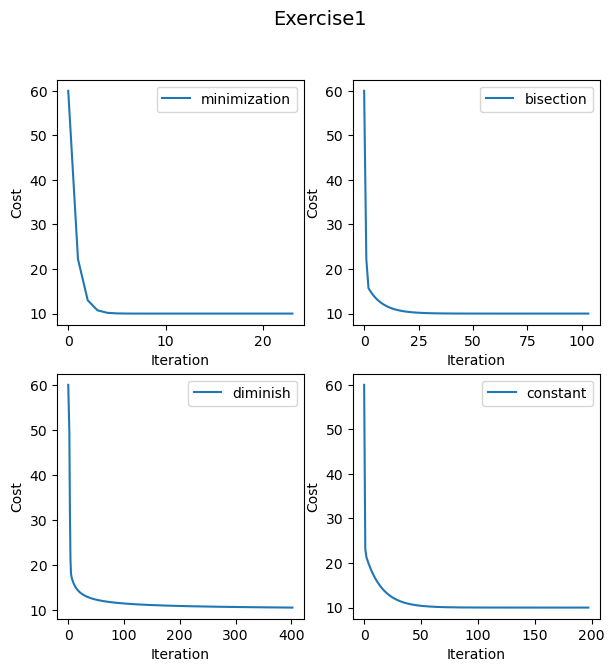

In [24]:
# plt.style.use(["science", "notebook", "grid"])
fig, axes = plt.subplots(2,2,figsize=(7,7))

axes[0][0].plot([i for i in range (len(x_current_minimization))], [f(i) for i in x_current_minimization],label="minimization")
axes[0][1].plot([i for i in range (len(x_current_bisection))], [f(i) for i in x_current_bisection],label="bisection")
axes[1][0].plot([i for i in range (len(x_current_diminish))], [f(i) for i in x_current_diminish],label="diminish")
axes[1][1].plot([i for i in range (len(x_current_constant))], [f(i) for i in x_current_constant], label = "constant")

axes[0][0].legend()
axes[0][0].set_xlabel("Iteration")
axes[0][0].set_ylabel("Cost")

axes[0][1].legend()
axes[0][1].set_xlabel("Iteration")
axes[0][1].set_ylabel("Cost")

axes[1][0].legend()
axes[1][0].set_xlabel("Iteration")
axes[1][0].set_ylabel("Cost")

axes[1][1].legend()
axes[1][1].set_xlabel("Iteration")
axes[1][1].set_ylabel("Cost")

# axes[0][0].set_title("Exercise1")
fig.suptitle('Exercise1', fontsize=14)
plt.savefig("Exercise1.pdf")